Unsupervised learning is one of the major learning paradigms in machine learning and it enables us to understand the patterns and relationships in the data without the guidance of ground truths in the data. Although many of the recent breakthroughs in machine learning in the previous decades came from the supervised learning front, unsupervised learning remains one of the most promising directions that the current data science and artificial intelligence can make use of. Although, we're living in a world with abundant amounts of data, labeling them with the ground truths is not an easy task as many times this requires costly and challenging human labor to annotate them. Unsupervised learning is of primary importance for data science as it has the potential to exploit enormous amounts of data without any need for annotation.

# Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

Apply dimensionality reduction techniques to visualize the observations.
Apply clustering techniques to group together similar observations.
In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

# The Data

I've chosen to look at the [Cervical Cancer Risk Classification](https://www.kaggle.com/loveall/cervical-cancer-risk-classification) dataset found on Kaggle. This data has information on 858 women on thirty-six different pieces of information including age, number of sexual partners, smoking habits, and STD diagnoses. I have chosen the target variable to be whether or not an individual has been diagnosed with cancer (the Dx: Cancer variable). I will clean the data, apply dimensionality reduction techniques for visualizations, and apply K-means, Hierarchical Clustering, DBSCAN, and GMM clustering techniques.

In [2]:
# Set up & handling the data
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import csv
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

import time

import seaborn as sns

In [3]:
cc = pd.read_csv('CervicalCancer.csv')
cc = pd.DataFrame(cc)
print(cc.columns)
print('\n', cc.describe())
cc.info()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

               Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513          

# The Cleaning 

While at first glance it appears that there are no missing values, I know from Kaggle that 12% of the cells are filled with a question mark. These cells will be filled with the mean of the respective column if not further discussed.

Columns STDs: Time since first diagnosis and STDs: Time since last diagnosis are missing 92% of values, so I will likely remove these variables. 

In [4]:
cc.replace('?', np.nan, inplace=True)
cc.info()
cc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                         4                       15                  1   
1   15                         1                       14                  1   
2   34                         1                      NaN                  1   
3   52                         5                       16                  4   
4   46                         3                       21                  4   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0      0              0                   0                       0   
1      0              0                   0                       0   
2      0              0                   0                       0   
3      1             37                  37                       1   
4      0              0                   0                       1   

  Hormonal Contraceptives (years) IUD  ... STDs: Time since first diagnosis  \
0                               0   0  ...                              NaN   
1                               0   0  ...                              NaN   
2                               0   0  ...                              NaN   
3                               3   0  ...                              NaN   
4                              15   0  ...                              NaN   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                             NaN         0      0      0  0          0   
1                             NaN         0      0      0  0          0   
2                             NaN         0      0      0  0          0   
3                             NaN         1      0      1  0          0   
4                             NaN         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [5]:
cc['Number of sexual partners'].fillna(cc['Number of sexual partners'].astype(float).mean(), inplace=True)
cc['First sexual intercourse'].fillna(cc['First sexual intercourse'].astype(float).mean(), inplace=True)
cc['Num of pregnancies'].fillna(cc['Num of pregnancies'].astype(float).mean(), inplace=True)
cc['Smokes (years)'].fillna(cc['Smokes (years)'].astype(float).mean(), inplace=True)
cc['Smokes (packs/year)'].fillna(cc['Smokes (packs/year)'].astype(float).mean(), inplace=True)


In [6]:
cc['STDs'].astype(float)

cc.loc[(cc['STDs'] == 0),'STDs: Time since first diagnosis'] = 100
cc.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                         4                       15                  1   
1   15                         1                       14                  1   
2   34                         1                  16.9953                  1   
3   52                         5                       16                  4   
4   46                         3                       21                  4   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0      0              0                   0                       0   
1      0              0                   0                       0   
2      0              0                   0                       0   
3      1             37                  37                       1   
4      0              0                   0                       1   

  Hormonal Contraceptives (years) IUD  ... STDs: Time since first diagnosis  \
0                               0   0  ...                              NaN   
1                               0   0  ...                              NaN   
2                               0   0  ...                              NaN   
3                               3   0  ...                              NaN   
4                              15   0  ...                              NaN   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                             NaN         0      0      0  0          0   
1                             NaN         0      0      0  0          0   
2                             NaN         0      0      0  0          0   
3                             NaN         1      0      1  0          0   
4                             NaN         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                845 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

In [8]:
cc['Hormonal Contraceptives'].value_counts(dropna=False)

1      481
0      269
NaN    108
Name: Hormonal Contraceptives, dtype: int64

In [9]:
cc_drop = cc.dropna(thresh=22, axis=0)
cc_drop = cc_drop.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])
cc_drop['Number of sexual partners'].fillna(cc_drop['Number of sexual partners'].astype(float).mean(), inplace=True)
cc_drop['First sexual intercourse'].fillna(cc_drop['First sexual intercourse'].astype(float).mean(), inplace=True)
cc_drop['Num of pregnancies'].fillna(cc_drop['Num of pregnancies'].astype(float).mean(), inplace=True)
cc_drop['Smokes'].fillna(0.0, inplace=True)
cc_drop['Smokes (years)'].fillna(cc_drop['Smokes (years)'].astype(float).mean(), inplace=True)
cc_drop['Smokes (packs/year)'].fillna(cc_drop['Smokes (packs/year)'].astype(float).mean(), inplace=True)
cc_drop['Hormonal Contraceptives'].fillna(0.0, inplace=True)
cc_drop['Hormonal Contraceptives (years)'].fillna(0.0, inplace=True)
cc_drop['IUD'].fillna(0.0, inplace=True)
cc_drop['IUD (years)'].fillna(0.0, inplace=True)

cc_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 34 columns):
Age                                   753 non-null int64
Number of sexual partners             753 non-null object
First sexual intercourse              753 non-null object
Num of pregnancies                    753 non-null object
Smokes                                753 non-null object
Smokes (years)                        753 non-null object
Smokes (packs/year)                   753 non-null object
Hormonal Contraceptives               753 non-null object
Hormonal Contraceptives (years)       753 non-null object
IUD                                   753 non-null object
IUD (years)                           753 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

In [10]:
cc_drop = cc_drop.astype(float)
cc_drop.head(10)

Age  Number of sexual partners  First sexual intercourse  \
0  18.0                        4.0                   15.0000   
1  15.0                        1.0                   14.0000   
2  34.0                        1.0                   16.9953   
3  52.0                        5.0                   16.0000   
4  46.0                        3.0                   21.0000   
5  42.0                        3.0                   23.0000   
6  51.0                        3.0                   17.0000   
7  26.0                        1.0                   26.0000   
8  45.0                        1.0                   20.0000   
9  44.0                        3.0                   15.0000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0            1.000000     0.0        0.000000                  0.0   
1            1.000000     0.0        0.000000                  0.0   
2            1.000000     0.0        0.000000                  0.0   
3            4.000000     1.0       37.000000                 37.0   
4            4.000000     0.0        0.000000                  0.0   
5            2.000000     0.0        0.000000                  0.0   
6            6.000000     1.0       34.000000                  3.4   
7            3.000000     0.0        0.000000                  0.0   
8            5.000000     0.0        0.000000                  0.0   
9            2.275561     1.0        1.266973                  2.8   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                              0.0  0.0  ...   
2                      0.0                              0.0  0.0  ...   
3                      1.0                              3.0  0.0  ...   
4                      1.0                             15.0  0.0  ...   
5                      0.0                              0.0  0.0  ...   
6                      0.0                              0.0  1.0  ...   
7                      1.0                              2.0  1.0  ...   
8                      0.0                              0.0  0.0  ...   
9                      0.0                              0.0  0.0  ...   

   STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV   Dx  \
0       0.0                        0.0        0.0     0.0     0.0  0.0   
1       0.0                        0.0        0.0     0.0     0.0  0.0   
2       0.0                        0.0        0.0     0.0     0.0  0.0   
3       0.0                        0.0        1.0     0.0     1.0  0.0   
4       0.0                        0.0        0.0     0.0     0.0  0.0   
5       0.0                        0.0        0.0     0.0     0.0  0.0   
6       0.0                        0.0        0.0     0.0     0.0  0.0   
7       0.0                        0.0        0.0     0.0     0.0  0.0   
8       0.0                        0.0        1.0     0.0     1.0  1.0   
9       0.0                        0.0        0.0     0.0     0.0  0.0   

   Hinselmann  Schiller  Citology  Biopsy  
0         0.0       0.0       0.0     0.0  
1         0.0       0.0       0.0     0.0  
2         0.0       0.0       0.0     0.0  
3         0.0       0.0       0.0     0.0  
4         0.0       0.0       0.0     0.0  
5         0.0       0.0       0.0     0.0  
6         1.0       1.0       0.0     1.0  
7         0.0       0.0       0.0     0.0  
8         0.0       0.0       0.0     0.0  
9         0.0       0.0       0.0     0.0  

[10 rows x 34 columns]

Resetting the index adds a column which really changed the visuals, so I had to make sure I dropped the new column in the variables.

In [11]:
cc_drop.reset_index(inplace=True)
y = cc_drop['Dx:Cancer']
X = cc_drop.drop(['Dx:Cancer', 'index'], axis=1)
X_std = StandardScaler().fit_transform(X)

print(X.shape, y.shape)

cc_drop.head(10)

(753, 33) (753,)


index   Age  Number of sexual partners  First sexual intercourse  \
0      0  18.0                        4.0                   15.0000   
1      1  15.0                        1.0                   14.0000   
2      2  34.0                        1.0                   16.9953   
3      3  52.0                        5.0                   16.0000   
4      4  46.0                        3.0                   21.0000   
5      5  42.0                        3.0                   23.0000   
6      6  51.0                        3.0                   17.0000   
7      7  26.0                        1.0                   26.0000   
8      8  45.0                        1.0                   20.0000   
9      9  44.0                        3.0                   15.0000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0            1.000000     0.0        0.000000                  0.0   
1            1.000000     0.0        0.000000                  0.0   
2            1.000000     0.0        0.000000                  0.0   
3            4.000000     1.0       37.000000                 37.0   
4            4.000000     0.0        0.000000                  0.0   
5            2.000000     0.0        0.000000                  0.0   
6            6.000000     1.0       34.000000                  3.4   
7            3.000000     0.0        0.000000                  0.0   
8            5.000000     0.0        0.000000                  0.0   
9            2.275561     1.0        1.266973                  2.8   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  ...  STDs:HPV  \
0                      0.0                              0.0  ...       0.0   
1                      0.0                              0.0  ...       0.0   
2                      0.0                              0.0  ...       0.0   
3                      1.0                              3.0  ...       0.0   
4                      1.0                             15.0  ...       0.0   
5                      0.0                              0.0  ...       0.0   
6                      0.0                              0.0  ...       0.0   
7                      1.0                              2.0  ...       0.0   
8                      0.0                              0.0  ...       0.0   
9                      0.0                              0.0  ...       0.0   

   STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV   Dx  Hinselmann  \
0                        0.0        0.0     0.0     0.0  0.0         0.0   
1                        0.0        0.0     0.0     0.0  0.0         0.0   
2                        0.0        0.0     0.0     0.0  0.0         0.0   
3                        0.0        1.0     0.0     1.0  0.0         0.0   
4                        0.0        0.0     0.0     0.0  0.0         0.0   
5                        0.0        0.0     0.0     0.0  0.0         0.0   
6                        0.0        0.0     0.0     0.0  0.0         1.0   
7                        0.0        0.0     0.0     0.0  0.0         0.0   
8                        0.0        1.0     0.0     1.0  1.0         0.0   
9                        0.0        0.0     0.0     0.0  0.0         0.0   

   Schiller  Citology  Biopsy  
0       0.0       0.0     0.0  
1       0.0       0.0     0.0  
2       0.0       0.0     0.0  
3       0.0       0.0     0.0  
4       0.0       0.0     0.0  
5       0.0       0.0     0.0  
6       1.0       0.0     1.0  
7       0.0       0.0     0.0  
8       0.0       0.0     0.0  
9       0.0       0.0     0.0  

[10 rows x 35 columns]

# Dimensionality Reduction

## PCA

In [23]:
print(y.value_counts())
print(y.shape)

0.0    735
1.0     18
Name: Dx:Cancer, dtype: int64
(753,)


In [26]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

pca = PCA(n_components=4)
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

pca = PCA(n_components=5)
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

pca = PCA(n_components=6)
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.15510864 0.09123001]
[0.15510864 0.09123001 0.07859804]
[0.15510857 0.09122971 0.07859548 0.0674538 ]
[0.15510864 0.09122939 0.07859729 0.06744567 0.05741964]
[0.15510862 0.09122979 0.07859782 0.06745656 0.05742161 0.05039008]


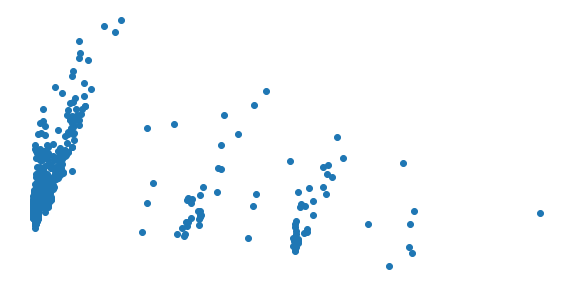

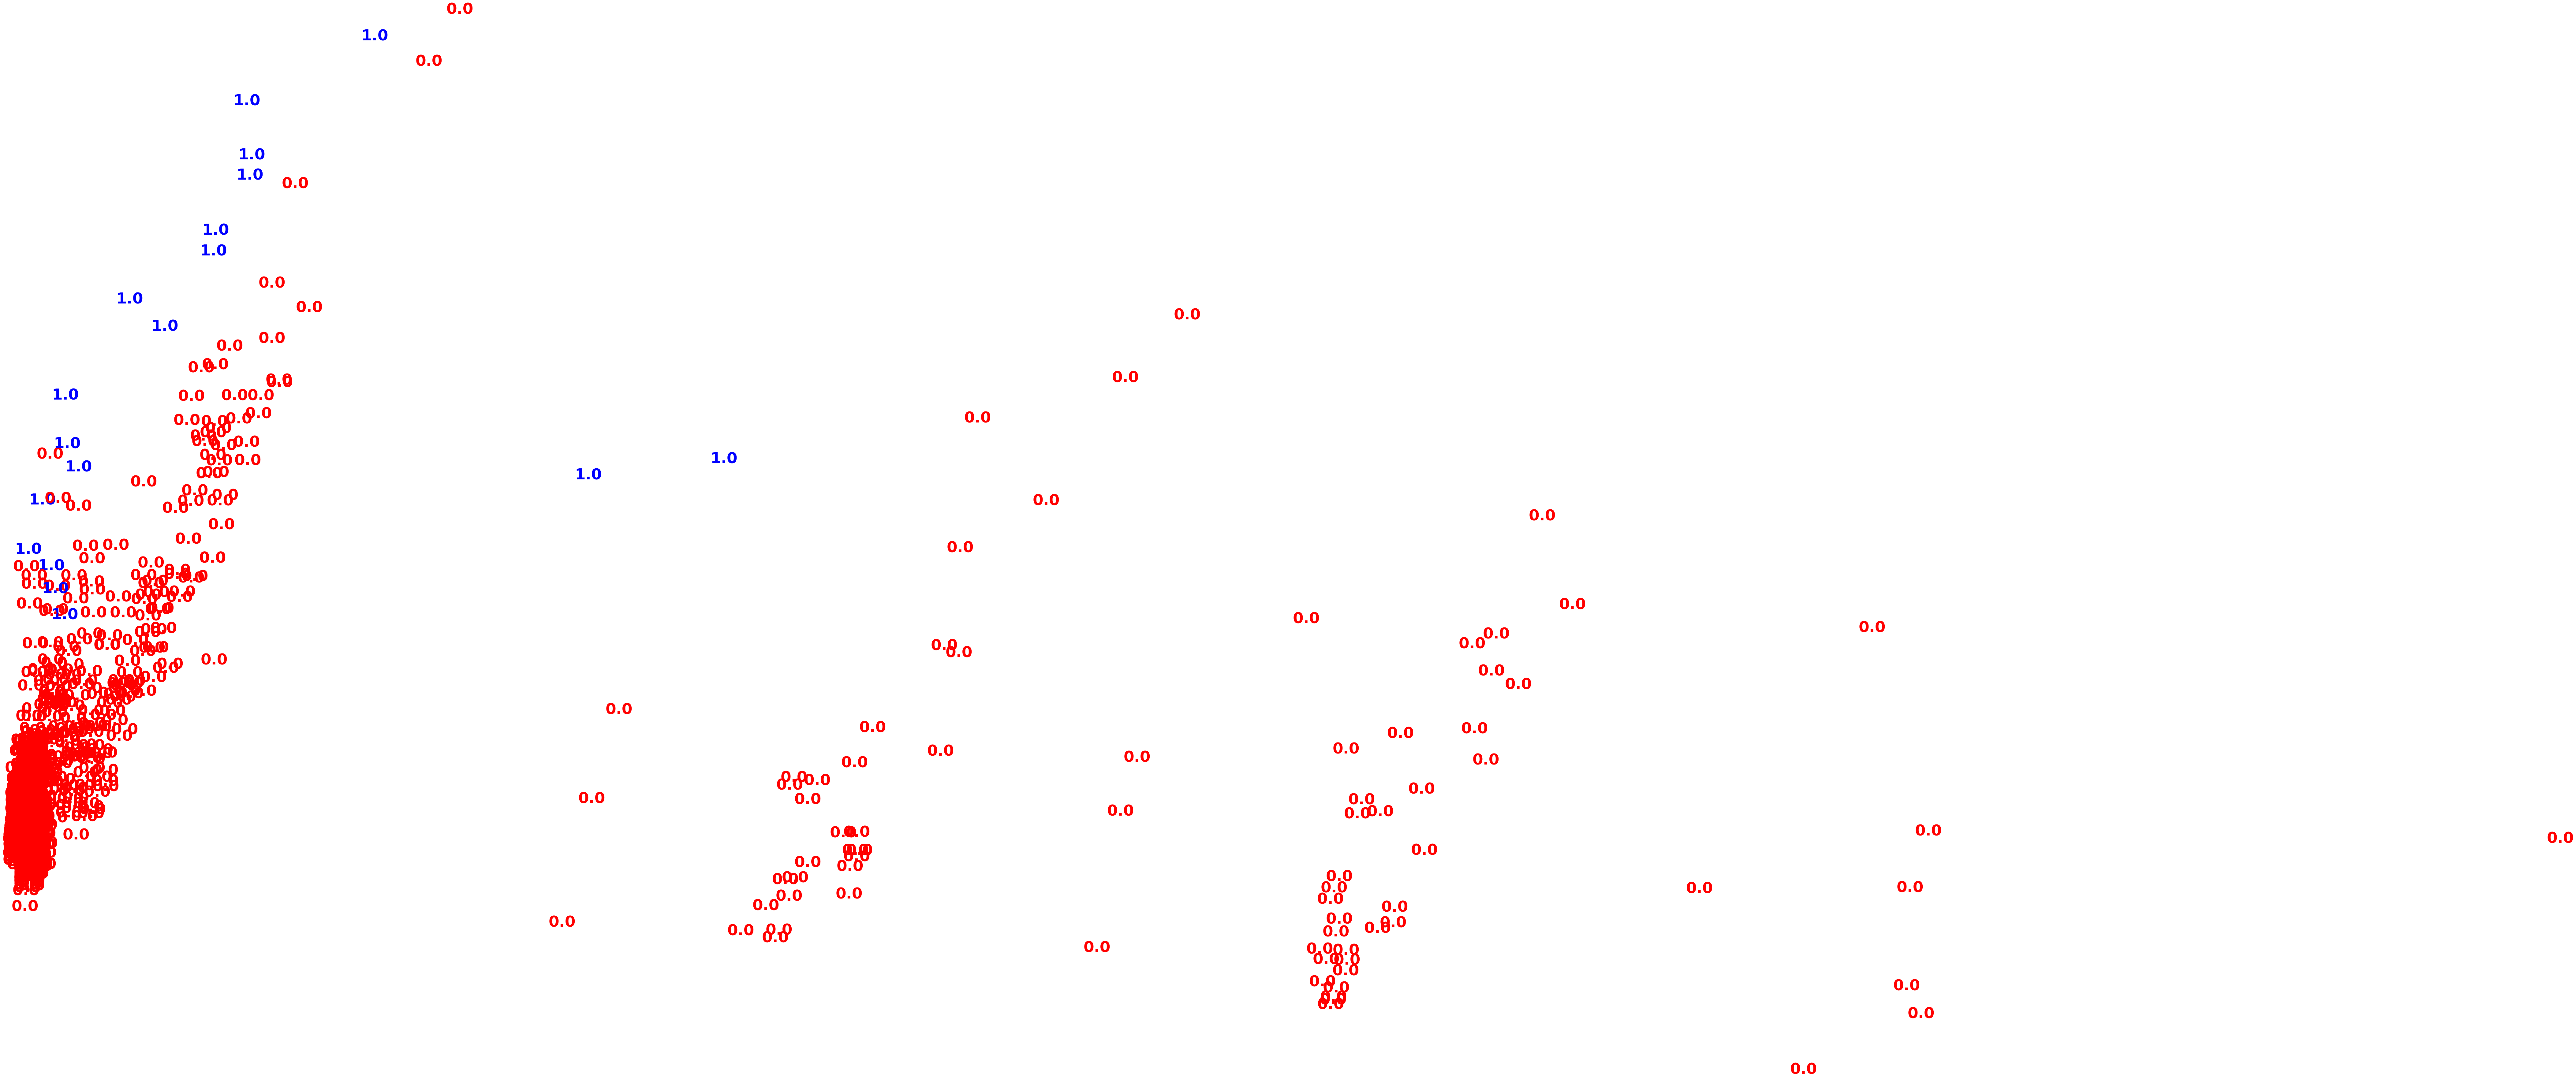

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE

Using a perplexity of 30 and 40 give the most distinguishable clusters.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.003s...
[t-SNE] Computed neighbors for 753 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 0.573225
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.000404
[t-SNE] KL divergence after 300 iterations: 0.892900
Cluster Graph with t-SNE with Perplexity  10


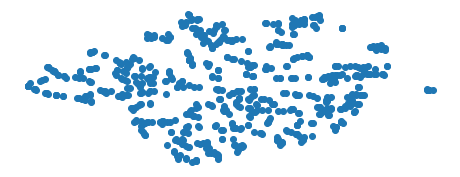

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.013s...
[t-SNE] Computed neighbors for 753 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 0.730216
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.544106
[t-SNE] KL divergence after 300 iterations: 0.738404
Cluster Graph with t-SNE with Perplexity  20


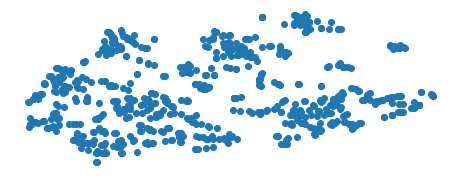

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.010s...
[t-SNE] Computed neighbors for 753 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 0.840719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.020958
[t-SNE] KL divergence after 300 iterations: 1.130755
Cluster Graph with t-SNE with Perplexity  30


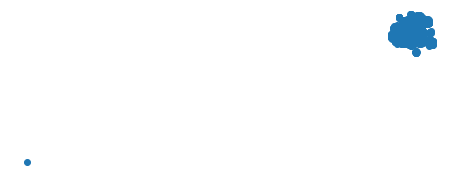

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.003s...
[t-SNE] Computed neighbors for 753 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 0.934084
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.479988
[t-SNE] KL divergence after 300 iterations: 1.351191
Cluster Graph with t-SNE with Perplexity  40


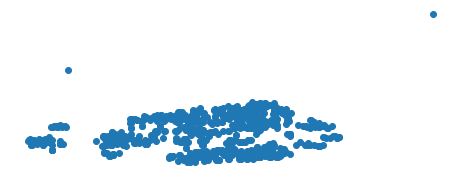

In [13]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_std)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.005s...
[t-SNE] Computed neighbors for 753 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 0.840719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.752586
[t-SNE] KL divergence after 300 iterations: 0.954457


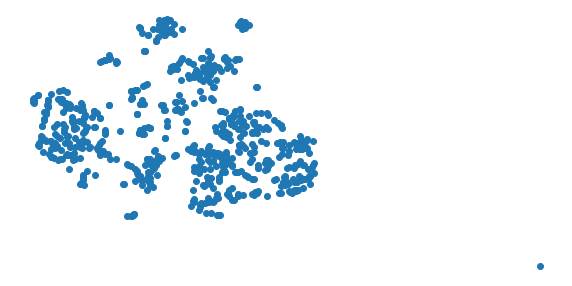

In [22]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 3))
colours = ["r","b"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [18]:
tsne_results.shape[0]

753

## UMAP

Ten neighbors with 0.5 distance gives the most distinct clusters, though fifteen neighbors at 0.1 distance does pretty well. While this dimensionality reduction gives seven distinct clusters, it separates the target variable much more so than the others.

UMAP with  5 neighbors and  0.01 minimum distance.


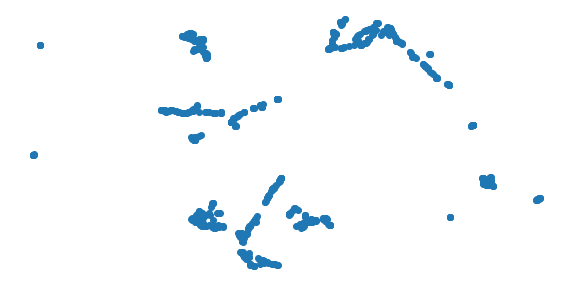



UMAP with  5 neighbors and  0.1 minimum distance.


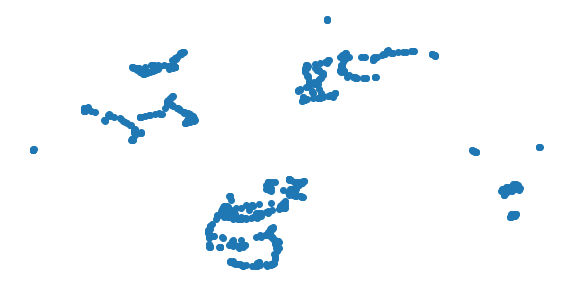



UMAP with  5 neighbors and  0.5 minimum distance.


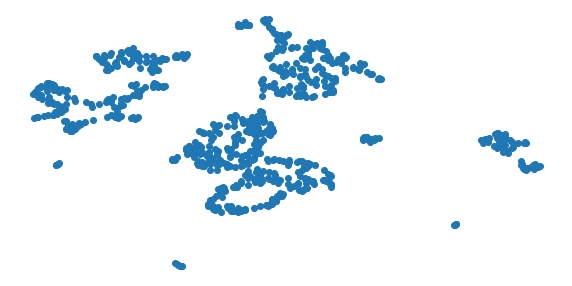



UMAP with  10 neighbors and  0.01 minimum distance.


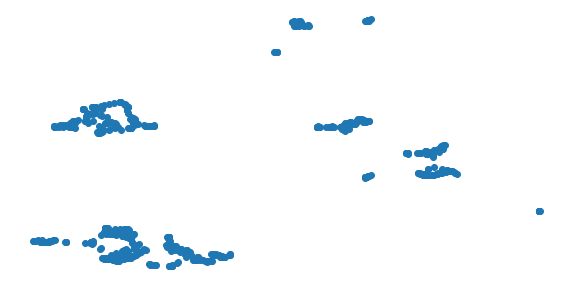



UMAP with  10 neighbors and  0.1 minimum distance.


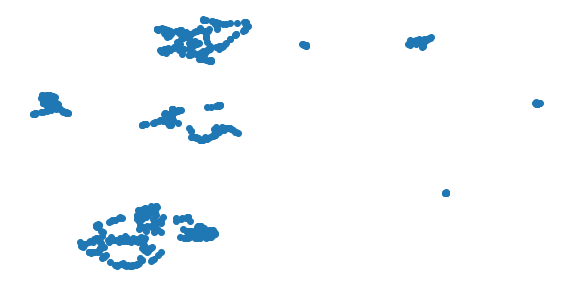



UMAP with  10 neighbors and  0.5 minimum distance.


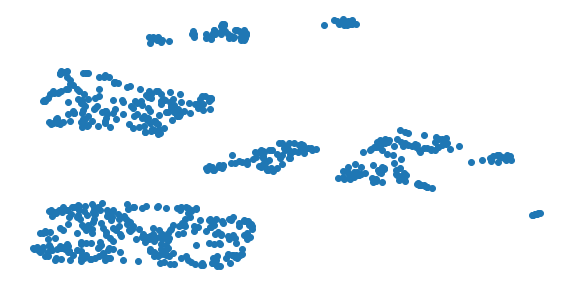



UMAP with  15 neighbors and  0.01 minimum distance.


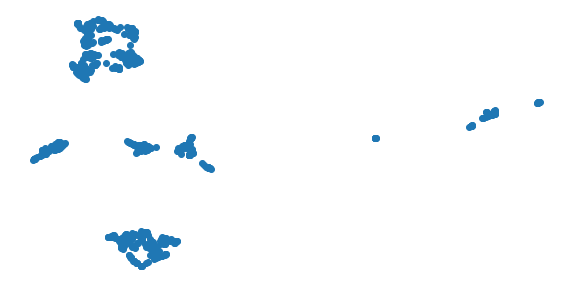



UMAP with  15 neighbors and  0.1 minimum distance.


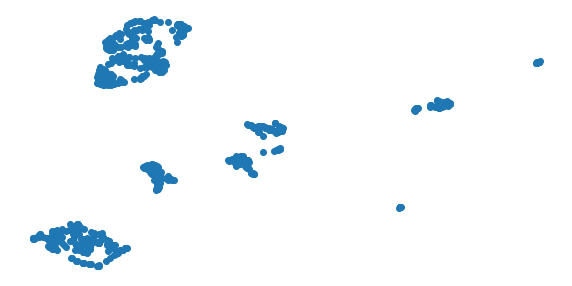



UMAP with  15 neighbors and  0.5 minimum distance.


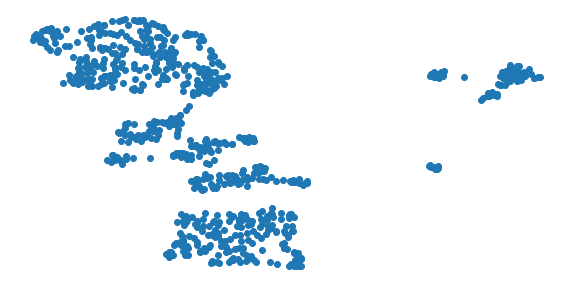



UMAP with  25 neighbors and  0.01 minimum distance.


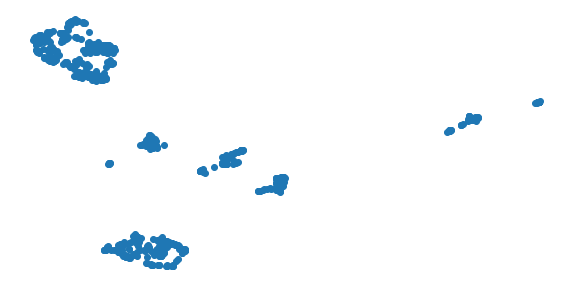



UMAP with  25 neighbors and  0.1 minimum distance.


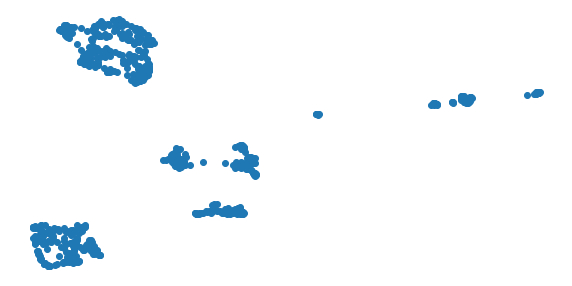



UMAP with  25 neighbors and  0.5 minimum distance.


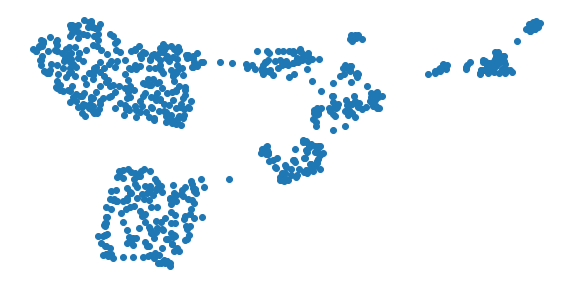

In [32]:
for n_neighbors in [5, 10, 15, 25]:
    for min_dist in [ 0.01, 0.1, 0.5]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_std)
        print('UMAP with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

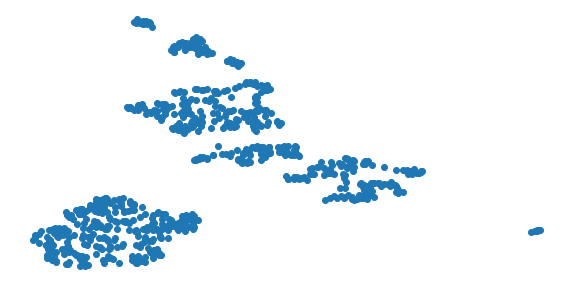

In [33]:
umap_results = umap.UMAP(n_neighbors=10, min_dist=0.5, metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

What the dimensionality reductions visualizations have shown us is that while there may be distinct clusters (t-SNE give us two and UMAP three), the target variable may not be well-defined by these clusters.

# Clustering 

## K-means with Standardized Variables

The ARI and silhouette scores are highest at 0.191 and 0.459 respectively when we have three clusters, indicating the UMAP method may be best for this data.

In [87]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

print('K-means with two clusters')
kmeans_cluster_2 = KMeans(n_clusters=2, random_state=123)
%timeit kmeans_cluster_2.fit(X_std)
y_pred = kmeans_cluster_2.predict(X_std)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(X_std, labels, metric='euclidean'))
print('\n')

print('K-means with three clusters')
kmeans_cluster_3 = KMeans(n_clusters=3, random_state=123)
%timeit kmeans_cluster_3.fit(X_std)
y_pred = kmeans_cluster_3.predict(X_std)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(X_std, labels, metric='euclidean'))
print('\n')

print('K-means with four clusters')
kmeans_cluster_4 = KMeans(n_clusters=4, random_state=123)
%timeit kmeans_cluster_4.fit(X_std)
y_pred = kmeans_cluster_4.predict(X_std)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(X_std, labels, metric='euclidean'))

K-means with two clusters
34.5 ms ± 6.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.0019486841996139536
Silhouette Score:  0.45887263692422325


K-means with three clusters
62.2 ms ± 6.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.1912168992622387
Silhouette Score:  0.45887263692422325


K-means with four clusters
64.9 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.10907029344000131
Silhouette Score:  0.45887263692422325


## K-means with PCA Components

In [88]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(pca_components)

print('K-means with two clusters')
kmeans_cluster_2 = KMeans(n_clusters=2, random_state=123)
%timeit kmeans_cluster_2.fit(pca_components)
y_pred = kmeans_cluster_2.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
print('\n')

print('K-means with three clusters')
kmeans_cluster_3 = KMeans(n_clusters=3, random_state=123)
%timeit kmeans_cluster_3.fit(pca_components)
y_pred = kmeans_cluster_3.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
print('\n')

print('K-means with two clusters')
kmeans_cluster_4 = KMeans(n_clusters=4, random_state=123)
%timeit kmeans_cluster_4.fit(pca_components)
y_pred = kmeans_cluster_4.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))


K-means with two clusters
40.3 ms ± 5.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.01346147558517267
Silhouette Score:  0.5264329561529398


K-means with three clusters
35.9 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.019415331699640753
Silhouette Score:  0.5264329561529398


K-means with two clusters
46.1 ms ± 4.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.014781377756861218
Silhouette Score:  0.5264329561529398


## K-means with t-SNE Components

In [89]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

clusters = [2, 3, 4, 5]

for cluster in clusters:
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(tsne_results)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    kmeans_cluster.fit(tsne_results)
    y_pred = kmeans_cluster.predict(tsne_results)
    print('ARI Score for ', cluster, 'clusters: ', metrics.adjusted_rand_score(y, y_pred))
    print('Silhouette Score for ', cluster, 'clusters: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
    print('\n')


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.002s...
[t-SNE] Computed neighbors for 753 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 1.793813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.425823
[t-SNE] KL divergence after 300 iterations: 0.742686
ARI Score for  2 clusters:  0.0010834596547186644
Silhouette Score for  2 clusters:  0.4248917549712625


ARI Score for  3 clusters:  0.001787554843730786
Silhouette Score for  3 clusters:  0.29240216676656366


ARI Score for  4 clusters:  1.179530279517935e-05
Silhouette Score for  4 clusters:  0.32426887233543633


ARI Score for  5 clusters:  -0.00040501242329488293
Silhouette Score for  5 clusters:  0.24655619125884076




## K-means with UMAP

In [96]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.01,
                      metric='correlation').fit_transform(X)

clusters = [2, 3, 4, 5]

for cluster in clusters:
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(umap_results)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    kmeans_cluster.fit(umap_results)
    y_pred = kmeans_cluster.predict(umap_results)
    print('ARI Score for ', cluster, 'clusters: ', metrics.adjusted_rand_score(y, y_pred))
    print('Silhouette Score for ', cluster, 'clusters: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
    print('\n')

ARI Score for  2 clusters:  0.006248263947627005
Silhouette Score for  2 clusters:  0.2732831707423768


ARI Score for  3 clusters:  -0.0011594703515312157
Silhouette Score for  3 clusters:  0.285688367781825


ARI Score for  4 clusters:  0.0028813107817883487
Silhouette Score for  4 clusters:  0.10914298782977626


ARI Score for  5 clusters:  0.0006776515097685612
Silhouette Score for  5 clusters:  0.011592540999403102




## Agglomerative Hierarchical Clustering with Standardized Variables

This model has the highest ARI score with ward linkage and three clusters. While the silhouette score isn't as great with these parameters, it's not bad.

In [91]:
linkage = ['ward', 'complete', 'average']
numbers = [2, 3, 4, 5]
for link in linkage:
    for cluster in numbers:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(X_std)
        print('ARI Score with', link, 'linkage and', cluster, 'clusters: {}'
              .format(metrics.adjusted_rand_score(y, clusters)))
        print('The Silhoutte score with', link,'linkage and', cluster, 'clusters: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        print('\n')
        

ARI Score with ward linkage and 2 clusters: -0.03461458069568806
The Silhoutte score with ward linkage and 2 clusters: 0.5077561209935656


ARI Score with ward linkage and 3 clusters: 0.21345123841149716
The Silhoutte score with ward linkage and 3 clusters: 0.5184570892029181


ARI Score with ward linkage and 4 clusters: 0.08281705995106173
The Silhoutte score with ward linkage and 4 clusters: 0.29771167234236456


ARI Score with ward linkage and 5 clusters: 0.08104249773237943
The Silhoutte score with ward linkage and 5 clusters: 0.3108570825226627


ARI Score with complete linkage and 2 clusters: -0.0024640290139163095
The Silhoutte score with complete linkage and 2 clusters: 0.7842544037629786


ARI Score with complete linkage and 3 clusters: -0.004691735174016759
The Silhoutte score with complete linkage and 3 clusters: 0.7776990061247833


ARI Score with complete linkage and 4 clusters: -0.006715119558695223
The Silhoutte score with complete linkage and 4 clusters: 0.7766466563524

## Agglomerative Clustering with PCA

The ARI and silhouette scores are best at 0.179 and 0.686 respectively with complete linkage and three clusters.

In [92]:
pca = PCA(n_components=2).fit_transform(X_std)


linkage = ['ward', 'complete', 'average']
numbers = [2, 3, 4, 5]
for link in linkage:
    for cluster in numbers:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(pca)
        print('ARI Score with', link, 'linkage and', cluster, 'clusters: {}'
              .format(metrics.adjusted_rand_score(y, clusters)))
        print('The Silhoutte score with', link,'linkage and', cluster, 'clusters: {}'.format(metrics.silhouette_score(pca, clusters, metric='euclidean')))
        print('\n')

ARI Score with ward linkage and 2 clusters: -0.034506662277552384
The Silhoutte score with ward linkage and 2 clusters: 0.7408737061935425


ARI Score with ward linkage and 3 clusters: 0.1377794259227509
The Silhoutte score with ward linkage and 3 clusters: 0.7234423367670676


ARI Score with ward linkage and 4 clusters: 0.07250668910911445
The Silhoutte score with ward linkage and 4 clusters: 0.6088859789770694


ARI Score with ward linkage and 5 clusters: 0.07115869389055601
The Silhoutte score with ward linkage and 5 clusters: 0.6076215932272009


ARI Score with complete linkage and 2 clusters: -0.03190694209785716
The Silhoutte score with complete linkage and 2 clusters: 0.749410473305799


ARI Score with complete linkage and 3 clusters: 0.17934654432581731
The Silhoutte score with complete linkage and 3 clusters: 0.6864167647730398


ARI Score with complete linkage and 4 clusters: 0.1792046075411015
The Silhoutte score with complete linkage and 4 clusters: 0.6795810907601699


ARI

## Agglomerative Hierarchical Clustering with t-SNE

This performs significantly worse than Agglomerative clustering with PCA. It's best with ward linkage and five clusters with an ARI of 0.0047 and a silhouette score of 0.42.

In [93]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)
    
linkage = ['ward', 'complete', 'average']
n_clusters = [2, 3, 4, 5]

for link in linkage:
    for cluster in n_clusters:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(tsne_results)
        
        print('Agglomerative Clustering with', link, 'linkage and', cluster, 'clusters.')
        print("Adjusted Rand Index of the Agglomerative Clustering solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the Agglomerative Clustering solution: {}".format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))
        print('\n')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.001s...
[t-SNE] Computed neighbors for 753 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 1.793813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.947708
[t-SNE] KL divergence after 300 iterations: 0.738048
Agglomerative Clustering with ward linkage and 2 clusters.
Adjusted Rand Index of the Agglomerative Clustering solution: -0.013880377870354408
The silhoutte score of the Agglomerative Clustering solution: 0.41517844796180725


Agglomerative Clustering with ward linkage and 3 clusters.
Adjusted Rand Index of the Agglomerative Clustering solution: 0.00016536701049374794
The silhoutte score of the Agglomerative Clustering solution: 0.42013877630233765


Agglomerative Clustering with ward linkage and 4 clusters.
Adjusted Rand Index of the Agglomerative Clustering solution: 0.0037752918030974233
The silhoutte score of the Agglomerativ

## Agglomerative Hierarchical Clustering with UMAP

Again, this method performs poorly with UMAP with ARI and silhouette scores similar to its performance with t-SNE.

In [95]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.01,
                      metric='correlation').fit_transform(X)
    
linkage = ['ward', 'complete', 'average']
n_clusters = [2, 3, 4, 5]

for link in linkage:
    for cluster in n_clusters:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(umap_results)
        
        print('Agglomerative Clustering with', link, 'linkage and', cluster, 'clusters.')
        print("Adjusted Rand Index of the Agglomerative Clustering solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the Agglomerative Clustering solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
        print('\n')

Agglomerative Clustering with ward linkage and 2 clusters.
Adjusted Rand Index of the Agglomerative Clustering solution: -0.018480060407331366
The silhoutte score of the Agglomerative Clustering solution: 0.44764477014541626


Agglomerative Clustering with ward linkage and 3 clusters.
Adjusted Rand Index of the Agglomerative Clustering solution: -0.009685437163911532
The silhoutte score of the Agglomerative Clustering solution: 0.5445075631141663


Agglomerative Clustering with ward linkage and 4 clusters.
Adjusted Rand Index of the Agglomerative Clustering solution: -0.0003965718312308617
The silhoutte score of the Agglomerative Clustering solution: 0.5418019890785217


Agglomerative Clustering with ward linkage and 5 clusters.
Adjusted Rand Index of the Agglomerative Clustering solution: 0.004585109746363303
The silhoutte score of the Agglomerative Clustering solution: 0.5181534886360168


Agglomerative Clustering with complete linkage and 2 clusters.
Adjusted Rand Index of the Agglo

## DBSCAN with Standardized Variables

The performance of DBSCAN increased as the eps and min samples increased with the best performance with ARI and silhouette scores of 0.216 and 0.471 when eps is five and min samples is three. This is the best ARI score so far.

In [98]:
eps = [0.1, 0.5, 1, 2, 5]
min_samples = [2, 3]

for ep in eps:
    for min_sample in min_samples:
        dbscan_cluster = DBSCAN(eps=ep, 
                                      min_samples=min_sample,)
        clusters = dbscan_cluster.fit_predict(X_std)
        
        print('DBSCAN with', ep, 'eps and', min_sample, 'min samples.')
        print("Adjusted Rand Index of the DBSCAN solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        print('\n')

DBSCAN with 0.1 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.03182375042658286
The silhoutte score of the DBSCAN solution: -0.4458960446810582


DBSCAN with 0.1 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.013193350303692546
The silhoutte score of the DBSCAN solution: -0.3078930149939144


DBSCAN with 0.5 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.035805790374876356
The silhoutte score of the DBSCAN solution: -0.2534438444304107


DBSCAN with 0.5 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.03761173170187113
The silhoutte score of the DBSCAN solution: -0.2875297257454308


DBSCAN with 1 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.010432233256974673
The silhoutte score of the DBSCAN solution: -0.06012429464559852


DBSCAN with 1 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.012017092674183778
The silhoutte score of the DBSCAN solution: 0

## DBSCAN with PCA

The best scores are obtained when eps is 0.5 and the min samples is two. 

In [40]:
pca = PCA(n_components=2).fit_transform(X_std)
eps = [0.1, 0.5, 1, 2, 3]
min_samples = [2, 3]

for ep in eps:
    for min_sample in min_samples:
        dbscan_cluster = DBSCAN(eps=ep, 
                                      min_samples=min_sample,)
        clusters = dbscan_cluster.fit_predict(pca)
        
        print('DBSCAN with', ep, 'eps and', min_sample, 'min samples.')
        print("Adjusted Rand Index of the DBSCAN solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(pca, clusters, metric='euclidean')))
        print('\n')


DBSCAN with 0.1 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.05916397034126223
The silhoutte score of the DBSCAN solution: 0.0319345600115747


DBSCAN with 0.1 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.05283728124301047
The silhoutte score of the DBSCAN solution: -0.042429014492658686


DBSCAN with 0.5 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.12437981672836596
The silhoutte score of the DBSCAN solution: 0.6081845076870918


DBSCAN with 0.5 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.12218976922034991
The silhoutte score of the DBSCAN solution: 0.6175285943826799


DBSCAN with 1 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.021342050550114386
The silhoutte score of the DBSCAN solution: 0.5897518561421384


DBSCAN with 1 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.02052525166527042
The silhoutte score of the DBSCAN solution: 0.64077325635

## DBSCAN with t-SNE

This is a pretty terrible combination - the best ARI score of 0.011 and silhouette score of 0.224 is obtained when eps is three regardless of how many min samples we have.

In [39]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)
    
eps = [0.1, 0.5, 1, 2, 3]
min_samples = [2, 3]

for ep in eps:
    for min_sample in min_samples:
        dbscan_cluster = DBSCAN(eps=ep, 
                                      min_samples=min_sample,)
        clusters = dbscan_cluster.fit_predict(tsne_results)
        
        print('DBSCAN with', ep, 'eps and', min_sample, 'min samples.')
        print("Adjusted Rand Index of the DBSCAN solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))
        print('\n')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.001s...
[t-SNE] Computed neighbors for 753 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 1.793813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.393188
[t-SNE] KL divergence after 300 iterations: 0.727598
DBSCAN with 0.1 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.017277636434329235
The silhoutte score of the DBSCAN solution: -0.5777917504310608


DBSCAN with 0.1 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.022303661979433776
The silhoutte score of the DBSCAN solution: -0.3886447250843048


DBSCAN with 0.5 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.004922458740684714
The silhoutte score of the DBSCAN solution: 0.2659412920475006


DBSCAN with 0.5 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.006800533598268658
The silhoutte score o

## DBSCAN with UMAP

Similar to the DBSCAN with t-SNE, this also performs terribly - the best ARI score of 0.13 and silhouette score of 0.57 occur with an eps of one, regardless of how many min samples we have.

In [38]:
eps = [0.1, 0.5, 1, 2, 3]
min_samples = [2, 3]

for ep in eps:
    for min_sample in min_samples:
        dbscan_cluster = DBSCAN(eps=ep, 
                                      min_samples=min_sample,)
        clusters = dbscan_cluster.fit_predict(umap_results)
        
        print('DBSCAN with', ep, 'eps and', min_sample, 'min samples.')
        print("Adjusted Rand Index of the DBSCAN solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
        print('\n')

DBSCAN with 0.1 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.003231912686799707
The silhoutte score of the DBSCAN solution: -0.48972347378730774


DBSCAN with 0.1 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: -0.03602950548339354
The silhoutte score of the DBSCAN solution: -0.7013732194900513


DBSCAN with 0.5 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.00749940341951833
The silhoutte score of the DBSCAN solution: 0.28419458866119385


DBSCAN with 0.5 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.007481689393313685
The silhoutte score of the DBSCAN solution: 0.3225870430469513


DBSCAN with 1 eps and 2 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.012867979579594528
The silhoutte score of the DBSCAN solution: 0.572726309299469


DBSCAN with 1 eps and 3 min samples.
Adjusted Rand Index of the DBSCAN solution: 0.012867979579594528
The silhoutte score of the DBSCAN solution: 0.5727263

## GMM with Standardized Variables

GMM doesn't perform well unless I use more than two components - using three components with a tied covariance type gives and ARI score of 0.18 and a silhouette score of 0.45. I wonder why this is - it re-emphasizes that this data is better separated into different variables than my chosen target.

In [49]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 3, 4]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(X_std)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        print('\n')


GMM with full covariance type and  2 components.
Adjusted Rand Index of the GMM solution: -0.0024640290139163095
The silhoutte score of the GMM solution: 0.7842544037629786


GMM with full covariance type and  3 components.
Adjusted Rand Index of the GMM solution: 0.13622141253064118
The silhoutte score of the GMM solution: 0.43124098563382446


GMM with full covariance type and  4 components.
Adjusted Rand Index of the GMM solution: 0.07449972244572328
The silhoutte score of the GMM solution: 0.3433027344639291


GMM with tied covariance type and  2 components.
Adjusted Rand Index of the GMM solution: -0.0024640290139163095
The silhoutte score of the GMM solution: 0.7842544037629786


GMM with tied covariance type and  3 components.
Adjusted Rand Index of the GMM solution: 0.18449670567286935
The silhoutte score of the GMM solution: 0.44716479777065893


GMM with tied covariance type and  4 components.
Adjusted Rand Index of the GMM solution: 0.17986271036875728
The silhoutte score of

## GMM with PCA

In [50]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 3, 4]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(pca_components)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))
        print('\n')

GMM with full covariance type and 2 components.
Adjusted Rand Index of the GMM solution: 0.04509164743126481
The silhoutte score of the GMM solution: 0.48448285707183325


GMM with full covariance type and 3 components.
Adjusted Rand Index of the GMM solution: 0.03414594216500146
The silhoutte score of the GMM solution: 0.5227841678040274


GMM with full covariance type and 4 components.
Adjusted Rand Index of the GMM solution: 0.034473911475065774
The silhoutte score of the GMM solution: 0.5228646614203938


GMM with tied covariance type and 2 components.
Adjusted Rand Index of the GMM solution: -0.0345658560678953
The silhoutte score of the GMM solution: 0.7503208992918154


GMM with tied covariance type and 3 components.
Adjusted Rand Index of the GMM solution: 0.14010542747739396
The silhoutte score of the GMM solution: 0.7142659290081262


GMM with tied covariance type and 4 components.
Adjusted Rand Index of the GMM solution: 0.13298617116823713
The silhoutte score of the GMM sol

## GMM with t-SNE

In [51]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 3, 4]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(tsne_results)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))
        print('\n')

GMM with full covariance type and 2 components.
Adjusted Rand Index of the GMM solution: 0.001982602770127244
The silhoutte score of the GMM solution: 0.39859873056411743


GMM with full covariance type and 3 components.
Adjusted Rand Index of the GMM solution: 0.004438257366560208
The silhoutte score of the GMM solution: 0.36799919605255127


GMM with full covariance type and 4 components.
Adjusted Rand Index of the GMM solution: -0.0046622846474233355
The silhoutte score of the GMM solution: 0.3485966622829437


GMM with tied covariance type and 2 components.
Adjusted Rand Index of the GMM solution: -0.002732925359452825
The silhoutte score of the GMM solution: 0.40648287534713745


GMM with tied covariance type and 3 components.
Adjusted Rand Index of the GMM solution: 0.0007212810191918252
The silhoutte score of the GMM solution: 0.4172288775444031


GMM with tied covariance type and 4 components.
Adjusted Rand Index of the GMM solution: 0.0005735292867805151
The silhoutte score of

## GMM with UMAP

In [52]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 3, 4]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(umap_results)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
        print('\n')

GMM with full covariance type and 2 components.
Adjusted Rand Index of the GMM solution: -0.01512395073582892
The silhoutte score of the GMM solution: 0.5674039721488953


GMM with full covariance type and 3 components.
Adjusted Rand Index of the GMM solution: 0.015088888124967394
The silhoutte score of the GMM solution: 0.5922119617462158


GMM with full covariance type and 4 components.
Adjusted Rand Index of the GMM solution: 0.004642372277955577
The silhoutte score of the GMM solution: 0.6152125597000122


GMM with tied covariance type and 2 components.
Adjusted Rand Index of the GMM solution: -0.01512395073582892
The silhoutte score of the GMM solution: 0.5674039721488953


GMM with tied covariance type and 3 components.
Adjusted Rand Index of the GMM solution: 0.022981014121446066
The silhoutte score of the GMM solution: 0.5710321068763733


GMM with tied covariance type and 4 components.
Adjusted Rand Index of the GMM solution: 0.016796790376943798
The silhoutte score of the GMM